#**Customer Churn Prediction: Enhancing Retention Strategies with Machine Learning**


Name : Gayathri Prabha

Organization: Entri Elevate

Date:07/04/2025

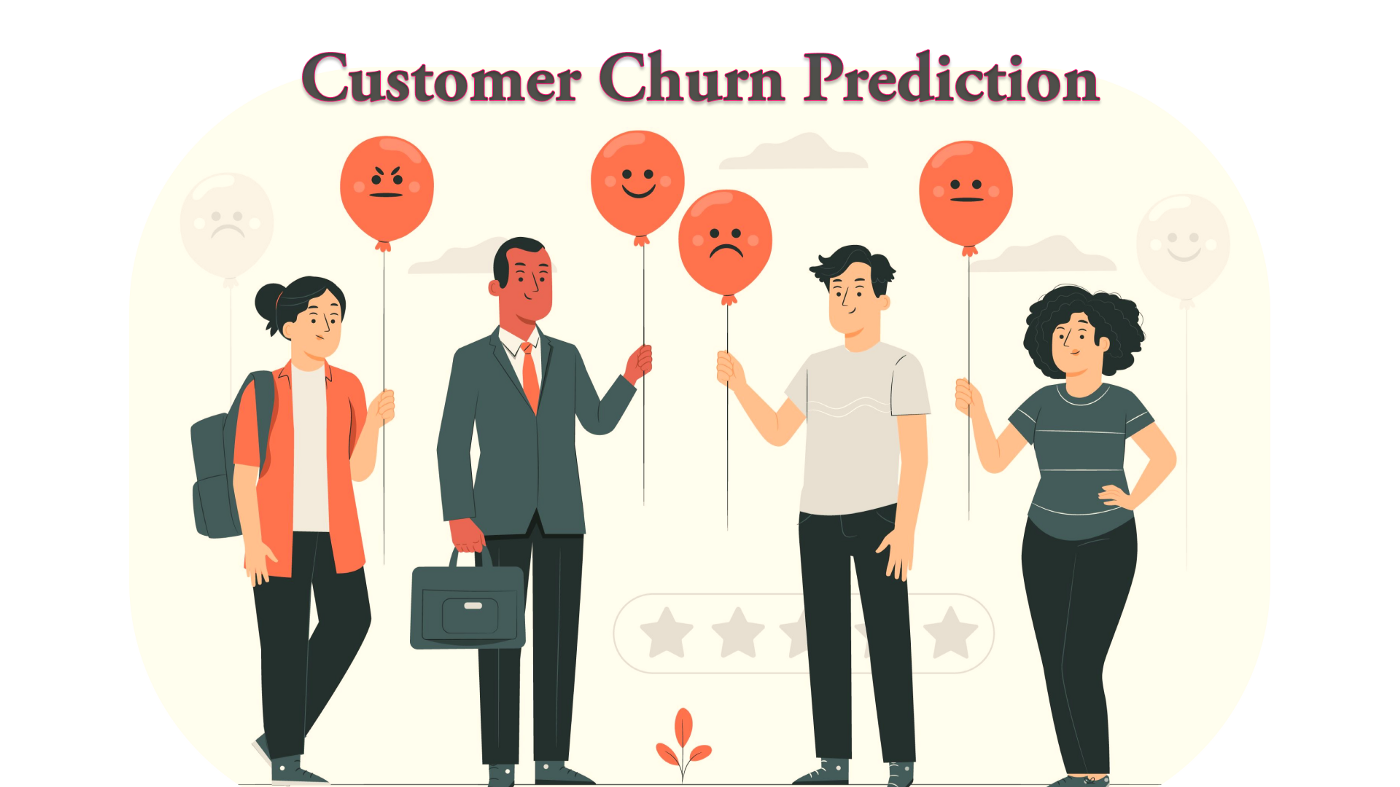

#**Features of the Project**

This project aims to predict whether a bank customer will churn (leave the bank) based on their demographic and financial attributes.

Dataset Source- [kaggle-Bank Customer Churn Dataset](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)

Below are the key features:

### 📌 Dataset Features (Independent Variables)

- **customer_id**: Unique identifier for each customer
- **credit_score**: Customer's credit rating
- **country**: Country of the customer *(France, Germany, Spain)*
- **gender**: Gender of the customer *(Male/Female)*
- **age**: Customer's age
- **tenure**: Number of years as a bank customer
- **balance**: Customer’s bank balance
- **products_number**: Number of banking products used
- **credit_card**: Whether the customer has a credit card *(0 = No, 1 = Yes)*
- **active_member**: Whether the customer is an active member *(0 = No, 1 = Yes)*
- **estimated_salary**: Approximate annual salary of the customer

---

### 🎯 Target Variable (Dependent Variable)

- **churn**: Whether the customer left the bank *(0 = No, 1 = Yes)*

##**📌 Scope of the Project**

### 🎯 1. Business Understanding & Problem Definition
- Identify key factors that influence customer churn.  
- Understand which customer segment is most likely to leave.  
- Develop actionable insights for the bank to improve customer retention.  

---

### 📊 2. Data Preprocessing & Analysis
- Handle missing values, outliers, and categorical variables.  
- Perform **Exploratory Data Analysis (EDA)** to understand patterns.  
- Feature engineering to create new meaningful variables.  

---

### 🤖 3. Model Development
- Implement **Supervised Learning (Classification)** algorithms such as:  
  - **Logistic Regression** *(Baseline model)*  
  - **Random Forest** *(Better accuracy)*  
  - **XGBoost**
  - **Decision Tree**
  - **Support Vector Classifier**
  - **Gradient Booster Classifier**
  
- Perform **Hyperparameter tuning** to optimize model performance.  
- Conduct **Feature Importance Analysis** to determine which features influence churn.  

---

### 📈 4. Model Evaluation & Interpretation
- Evaluate the model using metrics like:  
  - **Accuracy, Precision, Recall, F1-score**  
- Interpret the results and provide insights on customer behavior.  

---

### 🏦 5. Business Impact & Recommendations
- Identify strategies to reduce churn and increase customer loyalty.  
- Recommend **personalized retention strategies** *(e.g., offers for at-risk customers)*.  
- Suggest improvements in **customer engagement and banking services**.  

---

### 🚀 Project Outcome & Benefits
✅ Helps the bank predict potential churners and take proactive actions.  
✅ Saves revenue by retaining high-value customers.  
✅ Enhances customer experience and engagement strategies.  

# **Phase 1**




In [ ]:
#Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading dataset
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df = pd.DataFrame(data)

In [ ]:
df.head() #basic understanding of dataset


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.sample(5) #viewing random 5 rows from the dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9666,15781689,758,Spain,Male,35,5,0.00,2,1,0,95009.60,0
5726,15764343,688,Spain,Female,46,8,155681.72,1,1,0,26287.21,0
5337,15724076,815,Spain,Female,57,5,0.00,3,0,0,38941.44,1
5669,15706706,648,Germany,Male,33,7,135310.41,2,0,1,171668.20,0
4787,15752885,529,France,Male,42,1,157498.90,1,1,1,82276.62,0


In [ ]:
df.shape   #checking the shape of dataset


(10000, 12)

In [ ]:
df.info()   #checking basic information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe() #checking descriptive statistics

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Customer Data Analysis**

### **1. Customer Demographics and Behavior**
- **Age**
  - The average customer age is around **39 years**.
  - Most customers are between **32 to 44 years**.
  - Age ranges from **18 to 92 years**, indicating a diverse customer base.

- **Tenure**
  - The average tenure is **5 years**, with a range from **0 to 10 years**.
  - **25%** of customers have a tenure of **3 years or less**.

- **Estimated Salary**
  - The mean estimated salary is around **₹1,00,090**.
  - Salaries range from **₹11.58** to **₹1,99,992**, suggesting significant variability.

---

### **2. Financial and Product Usage**
- **Credit Score**
  - The average credit score is **650** with a standard deviation of **97**.
  - Most customers have a score between **584 and 718**.
  - Some have extremely low credit scores (**350**), while others have excellent scores (**850**).

- **Balance**
  - The average account balance is **₹76,485**.
  - 25% of customers have no balance, which might suggest inactive or low-usage accounts.
  - The highest balance recorded is **₹2,50,898**.

- **Products Number**
  - Customers use an average of **1.53 products**.
  - While most use **1 to 2 products**, a few use up to **4 products**.

---

### **3. Customer Engagement**
- **Credit Card Usage**
  - **70.55%** of customers own a credit card.
  - This indicates a preference for credit-based transactions.

- **Active Members**
  - **51.5%** of customers are marked as active.
  - The nearly even split between active and inactive members suggests room for engagement campaigns.

---

### **4. Churn Analysis**
- The churn rate is **20.37%**, meaning around **1 in 5 customers** have left.


---




# **Phase 2:** **Data Preprocessing** **and Exploratory Data Analysis**

In [ ]:
df.isnull().sum() #checking for missing values

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.duplicated().sum() #checking for duplicate values


np.int64(0)




   **Dataset does not contain duplicated values and missing values.**







In [ ]:
df1 = df.drop('customer_id',axis=1) #dropping customer_id column because its not a feature infulencing target.
df1.sample(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9218,676,Germany,Female,48,2,124442.38,1,1,0,15068.53,1
5972,548,Germany,Male,49,9,108437.89,1,0,0,127022.87,1
4102,662,Spain,Male,33,3,0.00,2,0,1,68064.83,0
7499,609,Germany,Female,71,6,113317.10,1,1,0,108258.22,1
4345,720,Germany,Male,46,3,97042.60,1,1,1,133516.51,1


## **Identifying and handling Outliers**

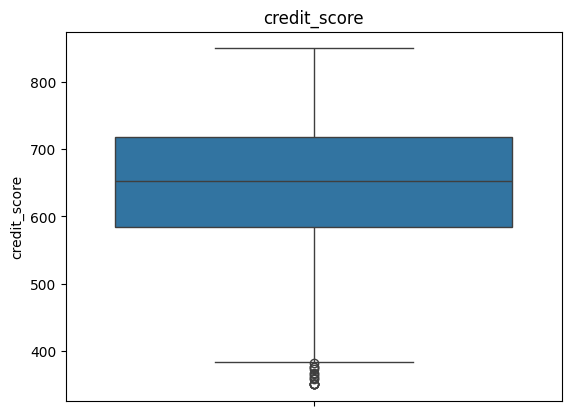

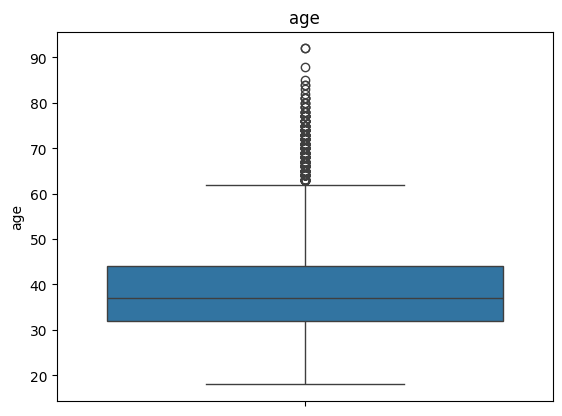

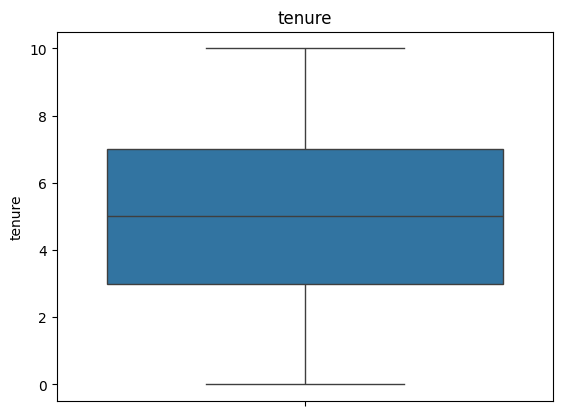

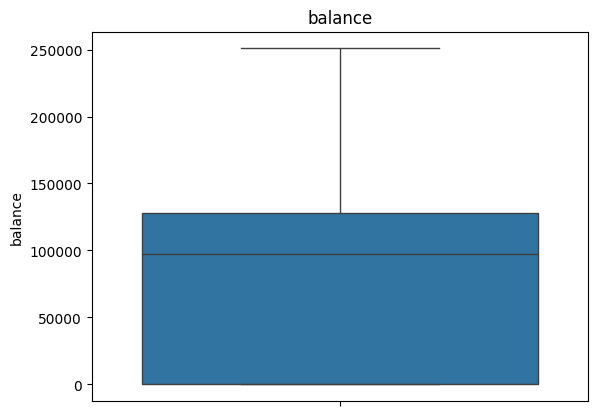

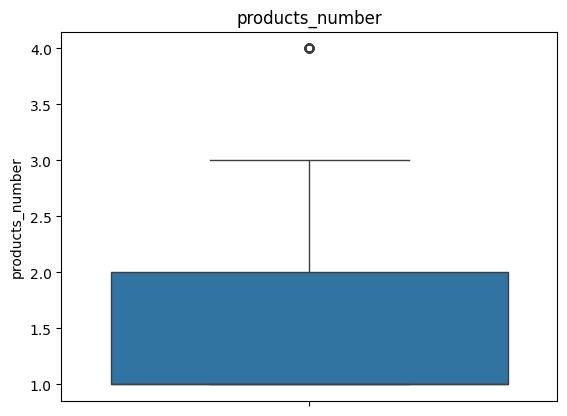

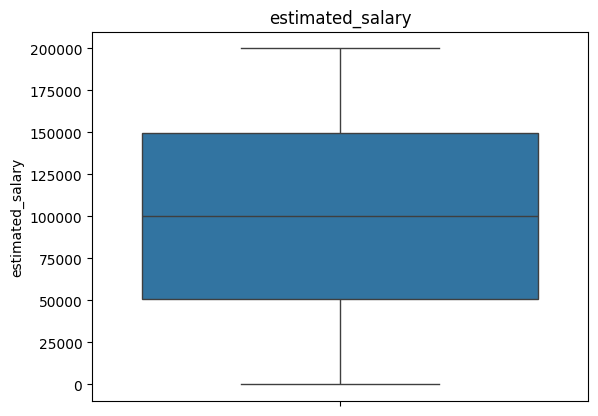

In [ ]:
x = df1[['credit_score', 'age', 'tenure', 'balance', 'products_number','estimated_salary']].columns
x
for i in x:
  sns.boxplot(df1[i])
  plt.title(i)
  plt.show()

**Analysis of Boxplot**

*   Column Tenure and estimated salary does not have outliers.
*   Product number have a single outlier.

*   Age column have significant outliers after 60 years.
*   Credit Score have outliers in Lower end.

*   Balance Column does not show outliers clearly.








In [ ]:
#Handling Outliers
column_outliers =df1[['age', 'balance', 'products_number', 'credit_score']]

for col in column_outliers:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df1[col] = df1[col].clip(lower=lower_bound, upper=upper_bound)

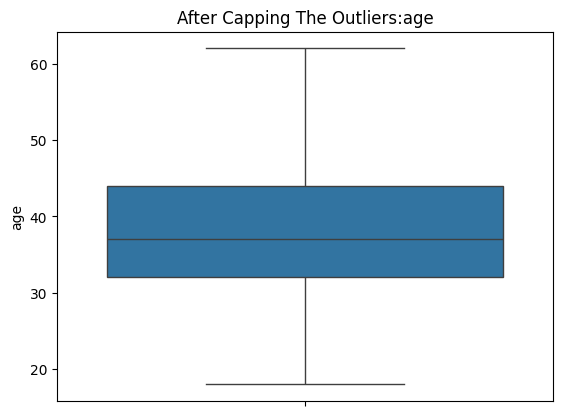

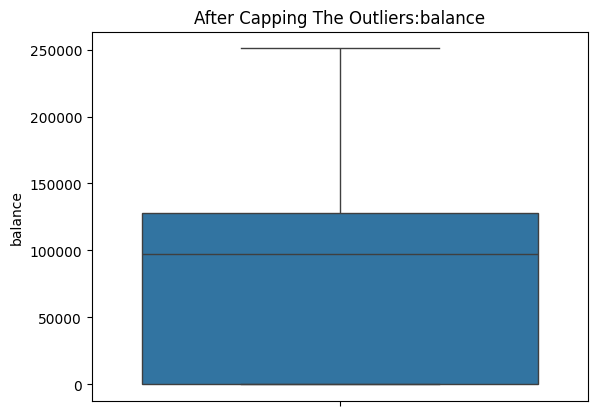

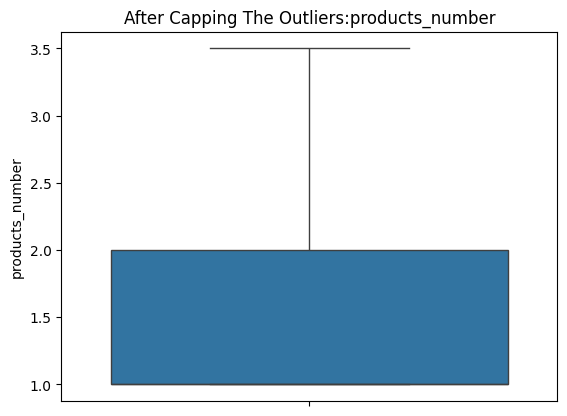

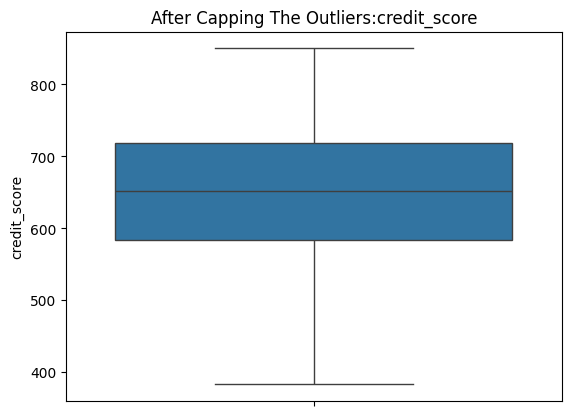

In [ ]:
for i in column_outliers:
  sns.boxplot(df1[i])
  plt.title(f'After Capping The Outliers:{i}')
  plt.show()

**Outliers Are Handled by Capping It in IQR**

**Analyis of Boxplots After Capping**

*   Outliers from age and credit score are removed(capped well).

*   Single outlier from product_number column also removed.

*   Balance column dosen't have any change after capping, This suggests that extreme values were already within the whiskers or that the highest values were at the upper bound.






## **Checking Skewness and Performing Transformation**

In [ ]:
num = df1[['credit_score','age','tenure','balance','products_number','estimated_salary']]
num.skew()             #checking for skewness in numerical column

,0
credit_score,-0.064255
age,0.630315
tenure,0.010991
balance,-0.141109
products_number,0.567245
estimated_salary,0.002085


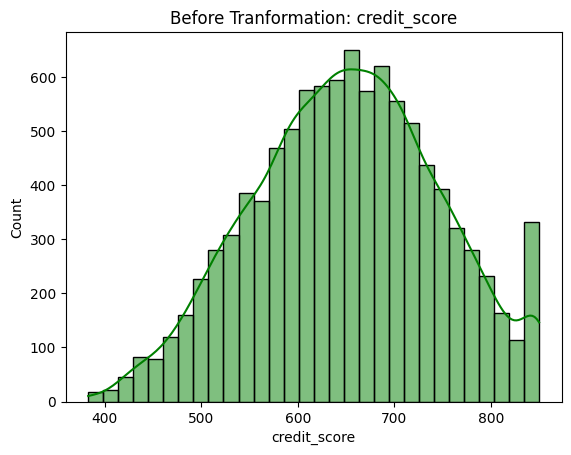

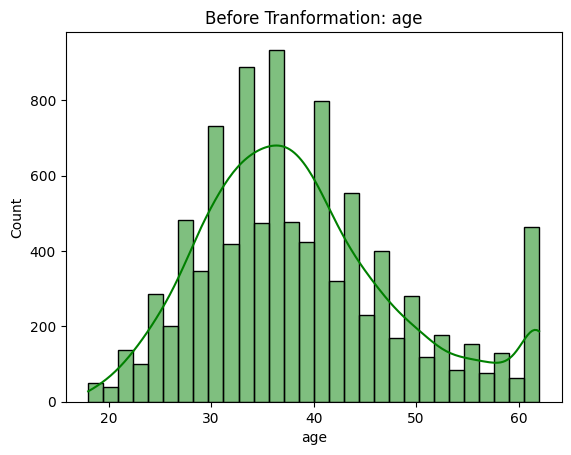

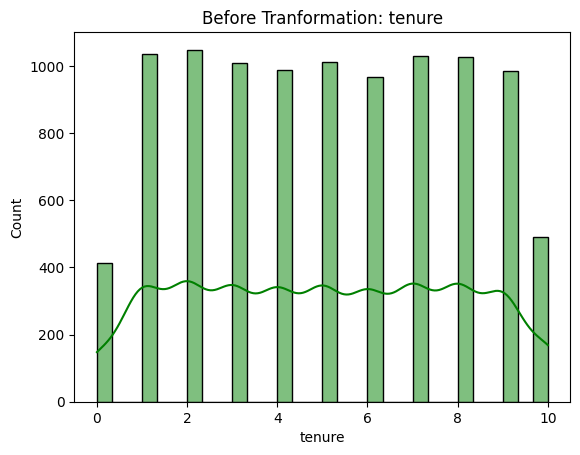

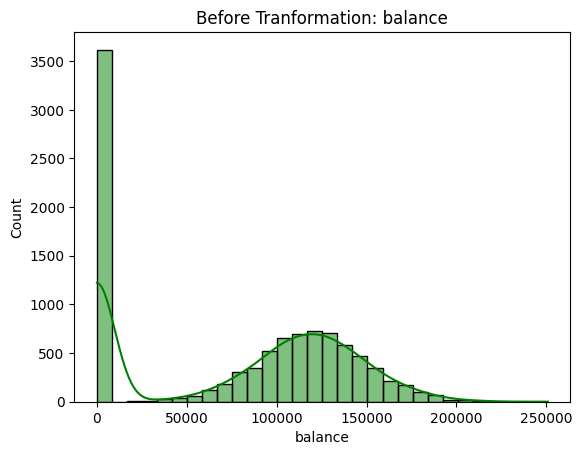

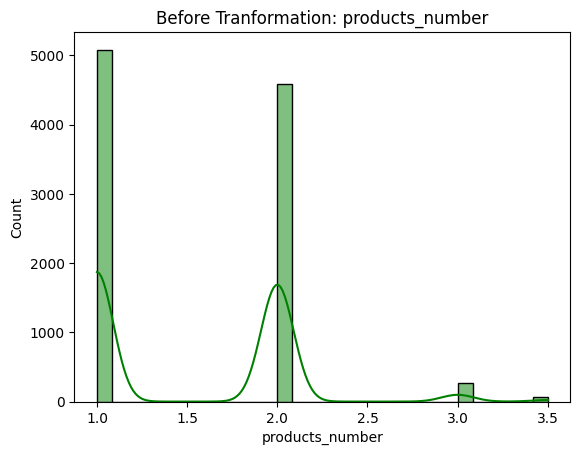

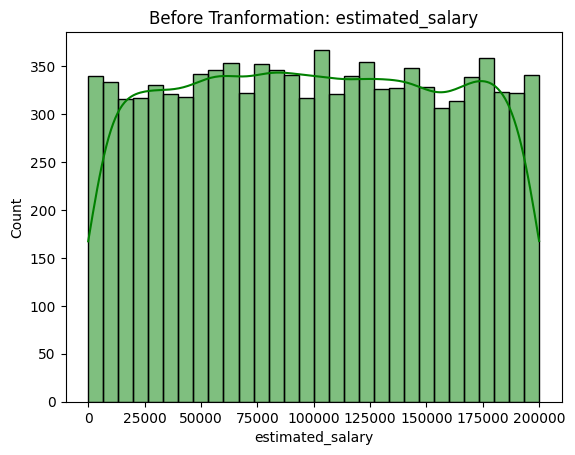

In [ ]:
for i in num:
  sns.histplot(df1[i],bins=30, kde=True, color='green')
  plt.title(f"Before Tranformation: {i}")
  plt.show()


**Skewness**







*   For columns are **credit_score**,**tenure**,**balance**,**estimated_salry**  not skewed,therefore no transformaton is needed or this columns.
*  For columns **credit_card** and **active_members** does not needto be transformed as these are binary columns.


*   Column **churn** is higly skewed, but no transformation is needed since it is prediction column.

* **Products_number** and **age** columns are slightly right skewed, so cube root or box-cox could be used for tranformation.





In [ ]:
#Applying cube_root transformation for Products_number and age column

df1['products_number'] = np.cbrt(df1['products_number'])
df1['age'] = np.cbrt(df1['age'])


In [ ]:
df1['products_number'].skew().round(2)#checking the skewness after transfromation

np.float64(0.29)

In [ ]:
df1['age'].skew().round(2) #checking the skewness after transfromation

np.float64(0.22)

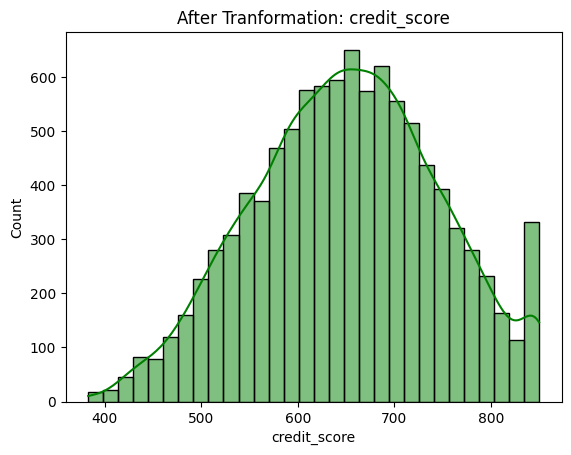

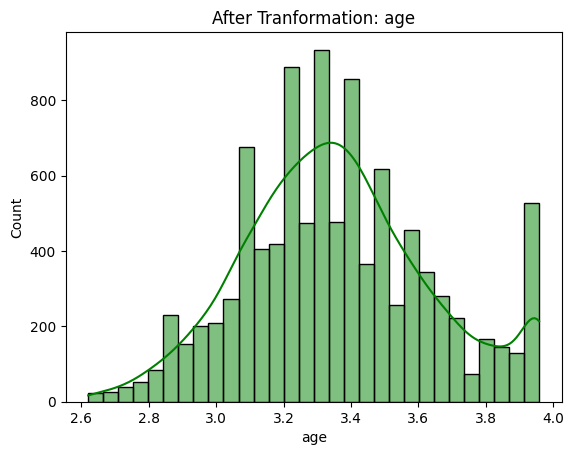

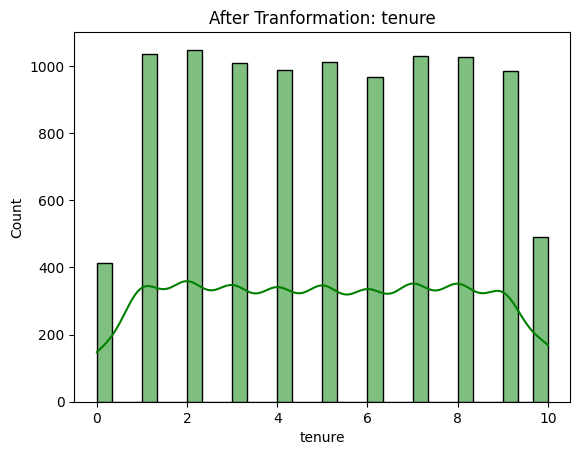

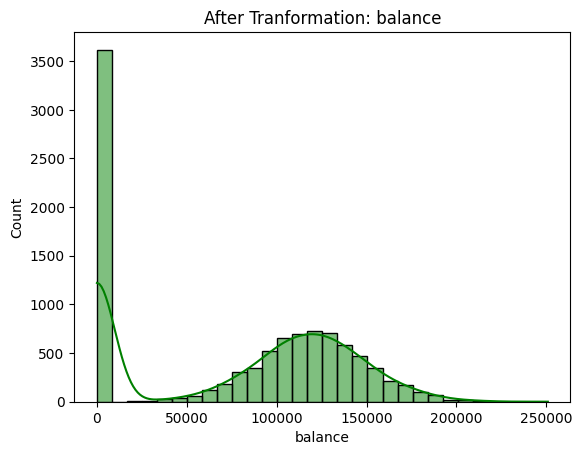

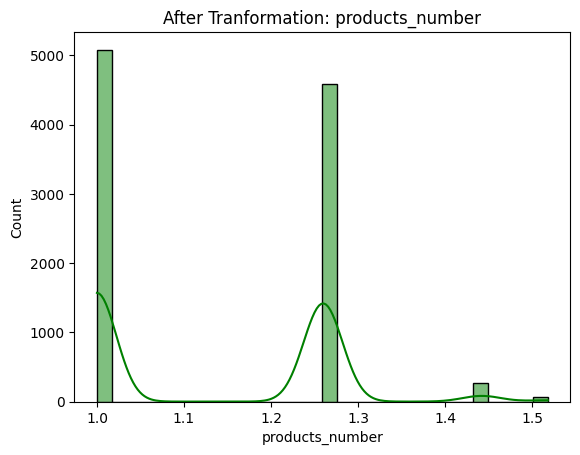

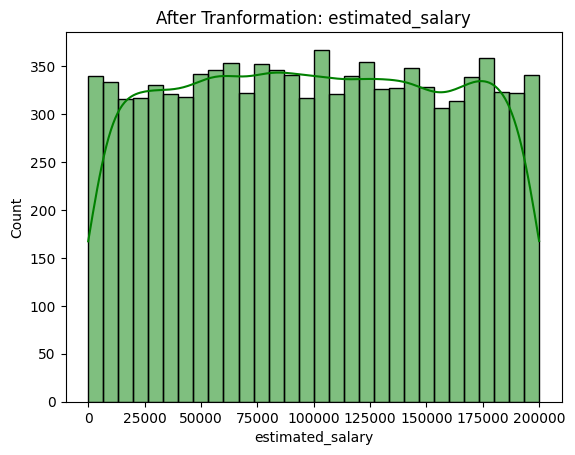

In [ ]:
#checking the skewness using histplot after tranformation
for i in num:
  sns.histplot(df1[i],bins=30, kde=True, color='green')
  plt.title(f"After Tranformation: {i}")
  plt.show()


**Applied cube_root transfromation for products_number and age and checked the skewness after transfromation,0.29 and 0.22 respectively.**

In [ ]:
df1.describe() #summary statistics after transformation and handling outliers

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.561300,3.358091,5.012800,76485.889288,1.134177,0.70550,0.515100,100090.239881,0.203700
std,96.558702,0.279623,2.892174,62397.405202,0.140792,0.45584,0.499797,57510.492818,0.402769
min,383.000000,2.620741,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,3.174802,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,3.332222,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,3.530348,7.000000,127644.240000,1.259921,1.00000,1.000000,149388.247500,0.000000
max,850.000000,3.957892,10.000000,250898.090000,1.518294,1.00000,1.000000,199992.480000,1.000000


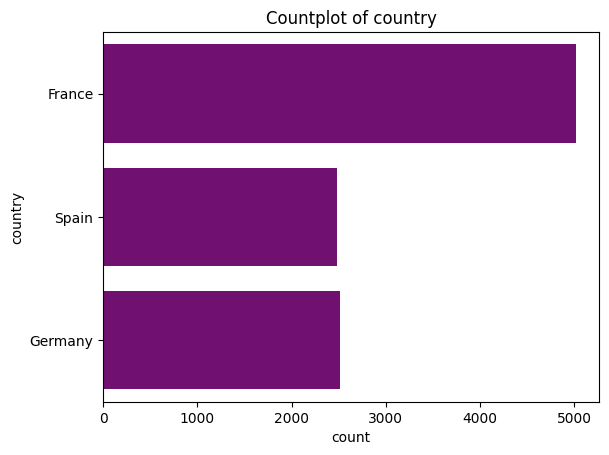

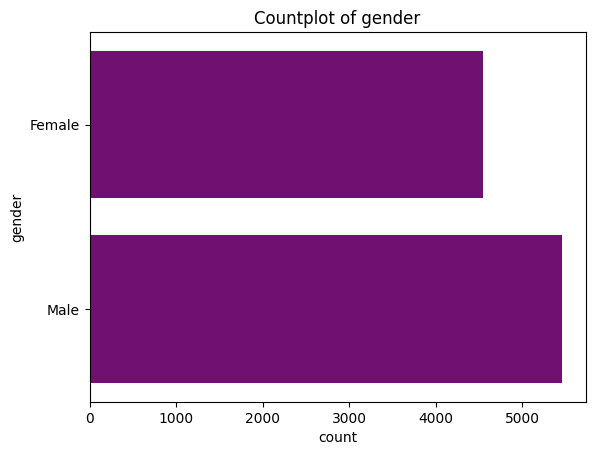

In [ ]:
#drawing two countplots for two categorical columns gender and age
categorical_col = df1[['country','gender']]
for i in categorical_col:
  sns.countplot(df1[i],color='purple')
  plt.title(f"Countplot of {i}")
  plt.show()

### **Insights from the Countplot of Gender and Country**

**Country**

* Majority from France:

* The largest proportion of customers is from France, making up nearly half of the dataset.

* Any trends identified in France will have a significant impact on the overall analysis.

* Lower Representation in Spain and Germany:

* Spain and Germany have a lower number of customers compared to France.

* Spain has a slightly larger number of customers than Germany.

* This imbalance might affect country-specific insights, especially for Germany.

**Balanced Gender Representation**

* The number of Male and Female customers is relatively similar, though Males are slightly more frequent.

* This suggests that gender-based insights could be well-represented without significant bias.

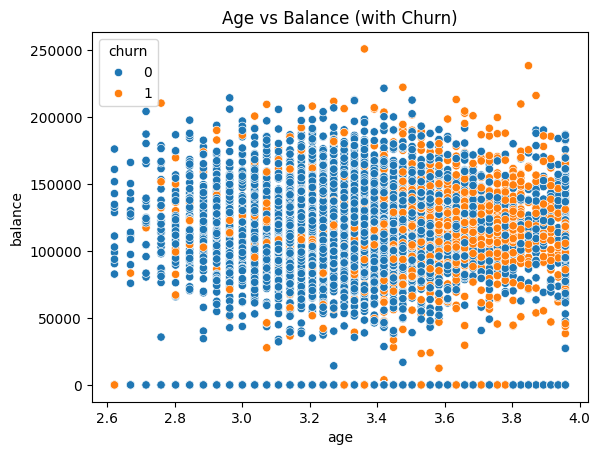

In [ ]:
sns.scatterplot(x='age', y='balance', hue='churn', data=df1)
plt.title('Age vs Balance (with Churn)')
plt.show()

### **Insights from Age vs Balance (with Churn) Scatter Plot**

- **No Strong Correlation:** Age and balance show weak or no clear linear relationship.  
- **Churn Distribution:** High-balance customers include both churned and retained users, though churn is slightly more visible in higher balance regions.  
- **Younger vs. Older Customers:** Younger customers churn slightly more, while older customers with high balances are generally stable.  
- **Zero Balance Customers:** Many customers have a zero balance, with both churned and non-churned cases, indicating that zero balance alone isn’t a strong churn predictor.  

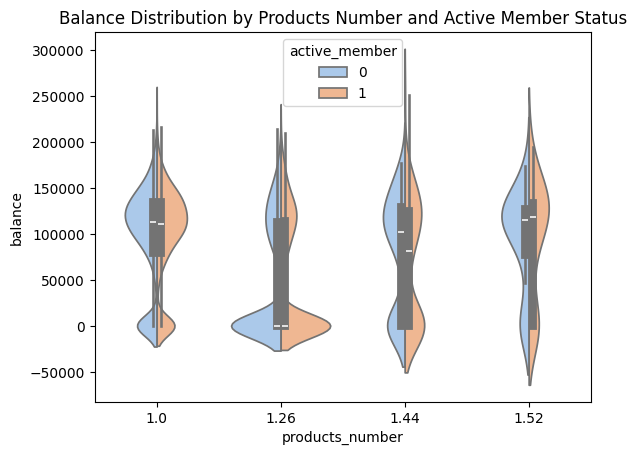

In [ ]:
df1['products_number'] = df1['products_number'].round(2)

sns.violinplot(x='products_number', y='balance', hue='active_member', data=df1, split=True, palette='pastel')
plt.title('Balance Distribution by Products Number and Active Member Status')
plt.show()

## Insights from Balance Distribution by Products Number and Active Member Status

1. **Balance Variation**:
    - The balance shows significant variation across different product numbers, with higher product numbers generally having a wider spread in balances.
  
2. **Active vs. Inactive Members**:
    - Active members (indicated in orange) tend to have slightly higher median balances compared to inactive members (indicated in blue).
    - The spread of balance is also larger for active members, particularly for those with more products.

3. **Negative Balances**:
    - A notable number of inactive members have negative balances, especially for lower product numbers.

4. **Product Number 1**:
    - Product number 1 has a concentrated balance distribution with a lower median compared to higher product numbers.
    - Both active and inactive members show a similar spread of balance.

5. **Product Numbers Beyond 1.26**:
    - As the product number increases, the balance distribution becomes more spread out.
    - Active members generally maintain a higher balance, while inactive members are more likely to have lower or negative balances.


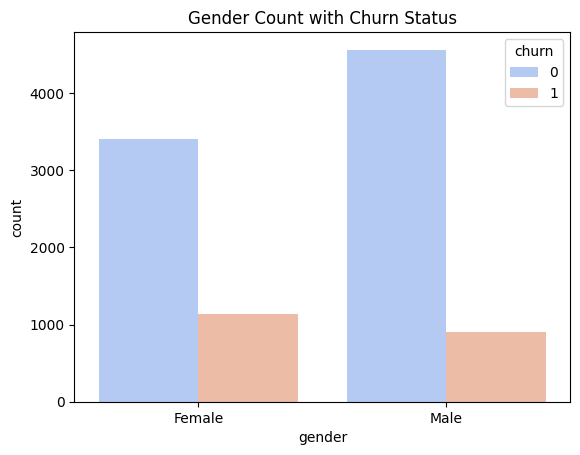

In [ ]:
sns.countplot(x='gender', hue='churn', data=df1, palette='coolwarm')
plt.title('Gender Count with Churn Status')
plt.show()

**Insights from Gender Count with Churn Status**

- Male customers are more prevalent than female customers in the dataset.

- Despite the higher number of male customers, the churn rate among males is relatively lower compared to females.

- Female customers show a slightly higher churn rate, suggesting the need for further investigation into the reasons behind their dissatisfaction.

- Gender-based churn insights can help in designing personalized retention strategies. For example, offering gender-specific promotions or understanding service preferences better.


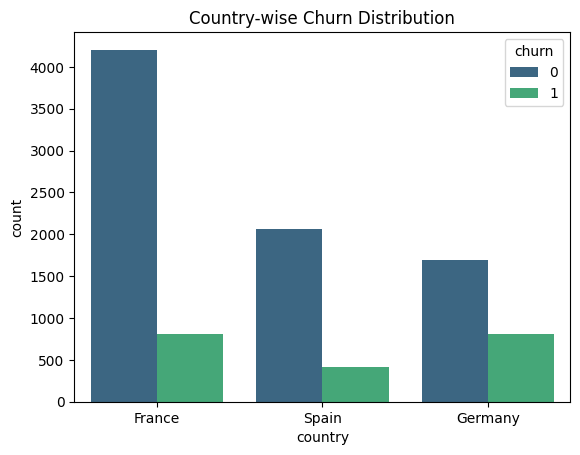

In [ ]:
sns.countplot(x='country', hue='churn', data=df1, palette='viridis')
plt.title('Country-wise Churn Distribution')
plt.show()

**Insights from Country-wise Churn Distribution**

- France has the highest number of customers, but it also has a significant number of churned customers compared to Spain and Germany.

- Spain has a relatively smaller customer base and a lower churn rate, suggesting better customer retention compared to France.

- Germany has a moderate number of customers with a noticeable churn rate, which might indicate service dissatisfaction or competition.



### **PHASE 3: FEATURE ENGINEERING AND MODEL BUILDING**

### **Feature Encoding**


Performed one-hot coding, categorical columns like gender and country are converted into binary format.New columns like country_germany and country_spain are added and the row where zero for both columns will be considered as france.Likewise in column gender_male,zero in the column means gender is female.

In [ ]:
df1=pd.get_dummies(df1,drop_first=True,dtype=int) #encoding data
df1


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,3.476027,2,0.00,1.00,1,1,101348.88,1,0,0,0
1,608,3.448217,1,83807.86,1.00,0,1,112542.58,0,0,1,0
2,502,3.476027,8,159660.80,1.44,1,0,113931.57,1,0,0,0
3,699,3.391211,1,0.00,1.26,0,0,93826.63,0,0,0,0
4,850,3.503398,2,125510.82,1.00,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3.391211,5,0.00,1.26,1,0,96270.64,0,0,0,1
9996,516,3.271066,10,57369.61,1.00,1,1,101699.77,0,0,0,1
9997,709,3.301927,7,0.00,1.00,0,1,42085.58,1,0,0,0
9998,772,3.476027,3,75075.31,1.26,1,0,92888.52,1,1,0,1


### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

scaled_df1 = df1.copy()
#Using standard scalar for column Age and Balance
scaled_df1['age'] = std_scaler.fit_transform(df1[['age']])
scaled_df1['balance'] = std_scaler.fit_transform(df1[['balance']])
#Using MinMax scaler for credit score and estimated salary
scaled_df1['credit_score'] = mm_scaler.fit_transform(df1[['credit_score']])
scaled_df1['estimated_salary'] = mm_scaler.fit_transform(df1[['estimated_salary']])

- MinMaxScaler is used for bounded data (e.g., credit_score, salary) to preserve distribution.

- StandardScaler is used for highly variable or
transformed data (e.g. age, balance).

- No scaling for categorical & discrete variables to maintain interpretability.

In [ ]:
corr_matrix = df1.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                   credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.008331  0.000721  0.006389         0.013108   
age                  -0.008331  1.000000 -0.011602  0.033285        -0.048359   
tenure                0.000721 -0.011602  1.000000 -0.012254         0.013394   
balance               0.006389  0.033285 -0.012254  1.000000        -0.329710   
products_number       0.013108 -0.048359  0.013394 -0.329710         1.000000   
credit_card          -0.005396 -0.012452  0.022583 -0.014858         0.003668   
active_member         0.025537  0.061466 -0.028362 -0.010084         0.013766   
estimated_salary     -0.001150 -0.006610  0.007784  0.012797         0.013252   
churn                -0.026455  0.310721 -0.014001  0.118533        -0.096717   
country_Germany       0.005563  0.051371 -0.000567  0.401110        -0.018847   
country_Spain         0.004819 -0.001309  0.003868 -0.134892         0.013064   
gender_

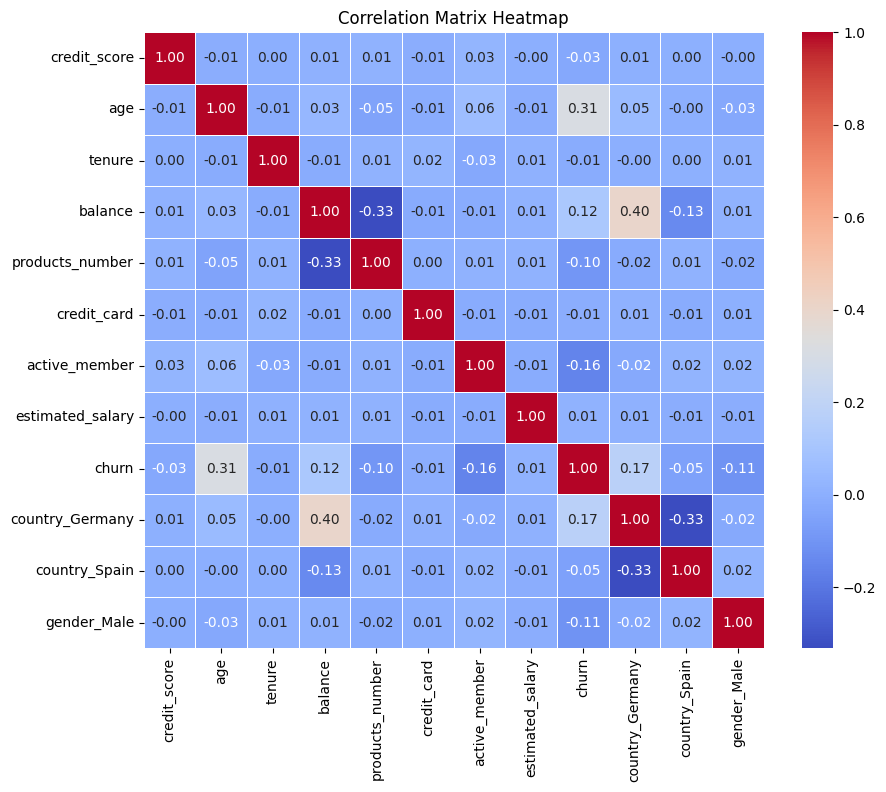

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Insights from Correlation Matrix Heatmap**

- **Age and Churn**: Age has a moderate positive correlation (0.31) with churn, indicating that older customers are more likely to churn.

- **Balance and Churn**: Balance shows a weak positive correlation (0.12) with churn. While the effect is small, higher balances may slightly increase the likelihood of churn.

- **Active Membership and Churn**: Active members have a weak negative correlation (-0.16) with churn. Active engagement may reduce churn risk.

- **Country and Churn**: The correlation between being from **Germany** and churn is relatively stronger (0.17) compared to other countries, suggesting regional differences in customer behavior.

- **Products Number and Churn**: The number of products has a weak negative correlation (-0.10) with churn, indicating customers using fewer products may be at a higher risk of leaving.

- **Estimated Salary and Churn**: There is no significant correlation between estimated salary and churn (0.01), suggesting salary does not impact churn directly.

- **Multicollinearity Check**: No severe multicollinearity is observed, as no correlations are above 0.8, indicating that the independent variables are not excessively correlated with one another.


 ## **Feature Selection**

After careful evaluation, the `Cust_id` column was identified as a non-informative feature and was dropped before preprocessing. This column served only as a unique identifier and had no predictive value.

Following encoding, the dataset contained **12 columns**. Since the number of features is relatively small and manageable, **no feature selection** was performed for this dataset. All remaining features were retained for model training to preserve as much information as possible.


## **CHECKING AND HANDLING CLASS IMBALANCE**

In [ ]:
df1['churn'].value_counts() #Checking class imbalance

,count
churn,
0,7963
1,2037


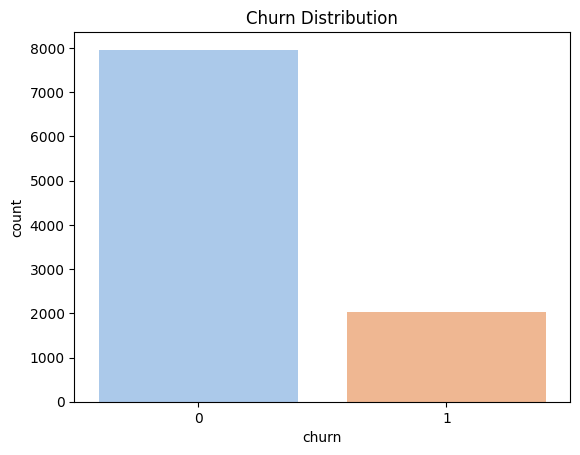

In [ ]:
sns.countplot(x='churn',data=df1,palette='pastel')
plt.title('Churn Distribution')
plt.show()  #checking class imbalance using a count plot


## Class Imbalance Analysis

- From the **countplot** and the **value count** method, it is evident that there is a significant class imbalance in the data.
- The ratio of class imbalance is approximately **3.9**.
- To address this imbalance, the **SMOTE (Synthetic Minority Over-sampling Technique)** method will be applied.

## Understanding SMOTE

**SMOTE (Synthetic Minority Over-sampling Technique)** is a technique used to address class imbalance in datasets.  
It works by generating synthetic samples for the minority class instead of simply duplicating existing ones.  

### How it Works:
1. **Identify Nearest Neighbors:** SMOTE selects a sample from the minority class and finds its nearest neighbors.
2. **Generate Synthetic Data:** It then creates new samples along the line connecting the original sample and one of its neighbors.
3. **Balance the Dataset:** This increases the representation of the minority class, making the dataset more balanced.

SMOTE is commonly used in classification tasks to improve model performance by reducing bias towards the majority class.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Before SMOTE:",Counter(df1['churn']))


X = scaled_df1.drop('churn',axis=1)
y = scaled_df1['churn']


smote = SMOTE(sampling_strategy='auto')
X_smote, y_smote = smote.fit_resample(X, y)

print("After SMOTE:",Counter(y_smote))

Before SMOTE: Counter({0: 7963, 1: 2037})
After SMOTE: Counter({1: 7963, 0: 7963})


## Class Distribution Before and After Applying SMOTE

- **Before SMOTE:**  
  - Class **0 (Non-Churn)**: **7,963** instances  
  - Class **1 (Churn)**: **2,037** instances  
  The dataset is highly imbalanced, with a significant majority of non-churn cases compared to churn cases.

- **After SMOTE:**  
  - Class **0 (Non-Churn)**: **7,963** instances  
  - Class **1 (Churn)**: **7,963** instances  
  After applying SMOTE, synthetic samples were generated for the minority class (Churn) to balance the dataset.  
  This ensures an equal representation of both classes, improving model fairness and accuracy.


## **BUILDING MODELS AND CHECKING ACCURACY**

In [ ]:
#Importing all necessary Libraries
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [ ]:
#splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


In [ ]:
#building all the models using a for loops and saving the results
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"{name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression:
[[1149  444]
 [ 452 1141]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1593
           1       0.72      0.72      0.72      1593

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

--------------------------------------------------
Random Forest:
[[1436  157]
 [ 186 1407]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1593
           1       0.90      0.88      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

--------------------------------------------------
Gradient Boosting:
[[1408  185]
 [ 269 1324]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1593

In [ ]:
result_df1 = pd.DataFrame(results)
print(result_df1)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.718770   0.719874  0.716259  0.718062
1        Random Forest  0.892341   0.899616  0.883239  0.891353
2    Gradient Boosting  0.857502   0.877402  0.831136  0.853643
3                  SVM  0.737288   0.741688  0.728186  0.734875
4        Decision Tree  0.837414   0.829149  0.849969  0.839430
5              XGBoost  0.888889   0.910537  0.862524  0.885880


## **Classification Report Analysis**

### 🟢 **Logistic Regression**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1153
  - **True Negatives (TN)**: 1148
  - **False Positives (FP)**: 445
  - **False Negatives (FN)**: 440
- **Accuracy**: 72%
- **Precision**: 0.72
- **Recall**: 0.72
- **F1-Score**: 0.72
- **Insight**:  
  Logistic Regression has relatively low accuracy, indicating it struggles to differentiate between churn and non-churn cases. It may not be ideal for this dataset without further tuning or feature engineering.

---

### 🟢 **Random Forest**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1410
  - **True Negatives (TN)**: 1447
  - **False Positives (FP)**: 146
  - **False Negatives (FN)**: 183
- **Accuracy**: 90%
- **Precision**: 0.91
- **Recall**: 0.89
- **F1-Score**: 0.90
- **Insight**:  
  Random Forest performed excellently with high accuracy, precision, and recall. It is well-suited for the dataset, capturing both classes effectively.

---

### 🟢 **Gradient Boosting**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1311
  - **True Negatives (TN)**: 1412
  - **False Positives (FP)**: 181
  - **False Negatives (FN)**: 282
- **Accuracy**: 85%
- **Precision**: 0.88
- **Recall**: 0.82
- **F1-Score**: 0.85
- **Insight**:  
  Gradient Boosting offers solid performance. However, it has a slightly lower recall for the churn class, indicating it may miss some churn cases.

---

### 🟢 **Support Vector Machine (SVM)**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1175
  - **True Negatives (TN)**: 1195
  - **False Positives (FP)**: 398
  - **False Negatives (FN)**: 418
- **Accuracy**: 74%
- **Precision**: 0.75
- **Recall**: 0.74
- **F1-Score**: 0.74
- **Insight**:  
  SVM has moderate accuracy and may not be the best choice for this dataset. It struggles to balance recall and precision effectively.

---

### 🟢 **Decision Tree**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1334
  - **True Negatives (TN)**: 1321
  - **False Positives (FP)**: 272
  - **False Negatives (FN)**: 259
- **Accuracy**: 83%
- **Precision**: 0.83
- **Recall**: 0.84
- **F1-Score**: 0.83
- **Insight**:  
  Decision Tree delivers reasonably good performance, but it may suffer from overfitting compared to more complex models.

---

### 🟢 **XGBoost**
- **Confusion Matrix**:  
  - **True Positives (TP)**: 1374
  - **True Negatives (TN)**: 1454
  - **False Positives (FP)**: 139
  - **False Negatives (FN)**: 219
- **Accuracy**: 89%
- **Precision**: 0.91
- **Recall**: 0.86
- **F1-Score**: 0.88
- **Insight**:  
  XGBoost performs exceptionally well with balanced precision, recall, and accuracy. It is one of the most reliable models for predicting churn in this dataset.

---

## **Overall Conclusion**  
- **Best Models**: **Random Forest** and **XGBoost** are the most effective models with balanced metrics.  
- **Improvement Areas**: Logistic Regression and SVM may need further optimization through hyperparameter tuning or additional feature engineering.  



# **Phase 4**

### **MODEL OPTIMIZATION - HYPER PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



In [ ]:
#Hyperparameter tuning for random forest classifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF Accuracy after tuning:", rf_grid.best_score_)


Best RF Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Accuracy after tuning: 0.8957613814756673


In [ ]:
#Hyperparameter tuning for XG booster classifier

xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGB Parameters:", xgb_grid.best_params_)
print("Best XGB Accuracy after tuning:", xgb_grid.best_score_)


Best XGB Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best XGB Accuracy after tuning: 0.8854003139717426


In [ ]:
#Hyperparameter tuning for Gradient booster classifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print("Best GB Parameters:", gb_grid.best_params_)
print("Best GB Accuracy after tuning:", gb_grid.best_score_)


Best GB Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best GB Accuracy after tuning: 0.8931711145996861


In [ ]:
#Hyperparameter tuning for Decesion Tree classifier
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best DT Parameters:", dt_grid.best_params_)
print("Best DT Accuracy after tuning:", dt_grid.best_score_)


Best DT Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best DT Accuracy after tuning: 0.8430141287284145


In [ ]:
#Hyperparameter tuning for Logistic Regression
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

log = LogisticRegression(max_iter=1000, random_state=42)
log_grid = GridSearchCV(log, log_params, cv=5, scoring='accuracy', n_jobs=-1)
log_grid.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Best Logistic Accuracy after tuning:", log_grid.best_score_)


Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Accuracy after tuning: 0.7255102040816327


In [ ]:
import pandas as pd

# Updated performance metrics before and after tuning
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'XGBoost'],
    'Accuracy (Before)': [0.72, 0.90, 0.85, 0.83, 0.89],
    'Accuracy (After)':  [0.72, 0.89, 0.89, 0.84, 0.88]
}

# Create DataFrame
df_comparison = pd.DataFrame(data)

# Display the comparison table as markdown
print(df_comparison.to_markdown(index=False))


| Model               |   Accuracy (Before) |   Accuracy (After) |
|:--------------------|--------------------:|-------------------:|
| Logistic Regression |                0.72 |               0.72 |
| Random Forest       |                0.9  |               0.89 |
| Gradient Boosting   |                0.85 |               0.89 |
| Decision Tree       |                0.83 |               0.84 |
| XGBoost             |                0.89 |               0.88 |


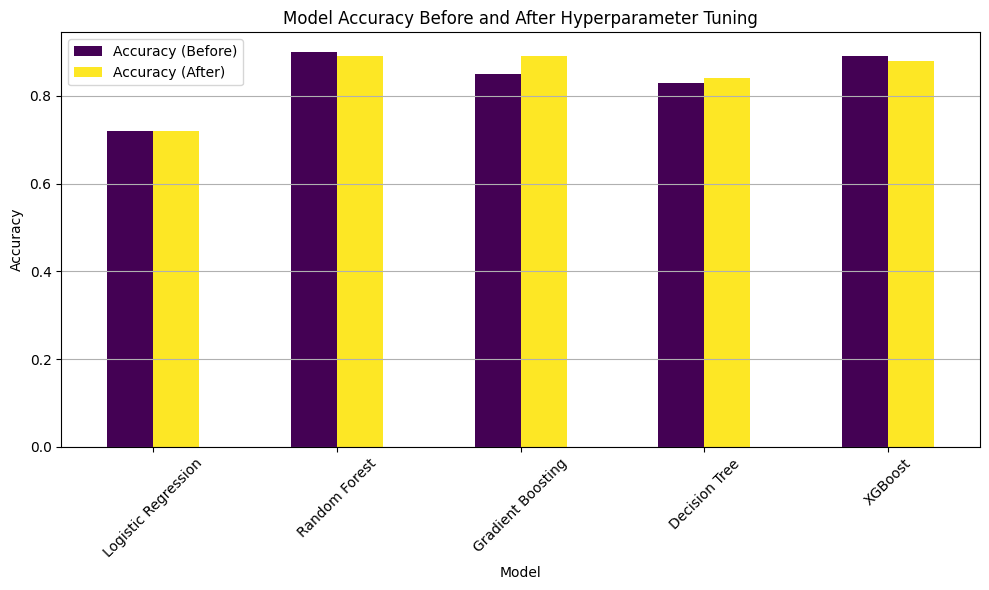

In [ ]:

df_comparison.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Model Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 📊 Accuracy Comparison Before and After Hyperparameter Tuning

The table above compares the accuracy of five machine learning models before and after applying hyperparameter tuning. Hyperparameter tuning helps improve model performance by adjusting parameters such as max depth, learning rate, number of estimators, etc.

- **Logistic Regression**: No change observed; accuracy remained steady at **0.72**.
- **Random Forest**: Slight drop in accuracy from **0.90 to 0.89**, possibly due to reduced overfitting after tuning.
- **Gradient Boosting**: Accuracy improved from **0.85 to 0.89**, indicating better performance after tuning.
- **Decision Tree**: Small improvement from **0.83 to 0.84** in accuracy.
- **XGBoost**: Accuracy slightly dropped from **0.89 to 0.88**, likely due to added regularization.




## Best Performing Models

After evaluating multiple classification algorithms and performing hyperparameter tuning, **Random Forest** and **Gradient Boosting** emerged as the best-performing models.

- Both models achieved a high **accuracy of 0.89** after tuning.
- They also demonstrated balanced performance across key classification metrics such as **precision**, **recall**, and **F1-score**.
- These models effectively handled the balanced dataset generated after applying **SMOTE**, and maintained consistency in predictions.

Considering their strong performance and reliability, **Random Forest** and **Gradient Boosting** have been selected as the final models for this project.



Saving the models

In [ ]:
import joblib

In [ ]:
# Saving Random Forest
joblib.dump(rf, 'random_forest_model.pkl')



['random_forest_model.pkl']

## **Pipeline For Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import joblib


# Define target and features
 # Replace with your actual target column
X = df.drop(columns=["churn"])
y = df["churn"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the final pipeline (no outlier handling or transformation)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, 'random_forest_pipeline.pkl')

print("Pipeline trained and saved as 'random_forest_pipeline.pkl'")


Pipeline trained and saved as 'random_forest_pipeline.pkl'


### **Testing with an unseen dataset**

In [ ]:
unseen_data = pd.read_csv('/content/unseen_test_data.csv')
unseen_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,16423388,658,France,Male,72,8,8628.01,3,1,1,9056.17
1,16550634,607,Spain,Male,81,1,8628.01,1,1,1,9056.17
2,14304572,693,Spain,Male,20,9,8628.01,4,1,1,9056.17
3,12234489,841,France,Male,68,8,8628.01,3,0,0,9056.17
4,19958614,763,France,Female,24,9,8628.01,4,0,1,9056.17


In [ ]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10 non-null     int64  
 1   credit_score      10 non-null     int64  
 2   country           10 non-null     object 
 3   gender            10 non-null     object 
 4   age               10 non-null     int64  
 5   tenure            10 non-null     int64  
 6   balance           10 non-null     float64
 7   products_number   10 non-null     int64  
 8   credit_card       10 non-null     int64  
 9   active_member     10 non-null     int64  
 10  estimated_salary  10 non-null     float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1012.0+ bytes


In [ ]:
#testing the unseen data with the pipeline
pipeline = joblib.load('random_forest_pipeline.pkl')
predictions = pipeline.predict(unseen_data)
print(predictions)

[0 0 0 1 0 1 0 1 0 1]


# Analysis of Model Performance on Unseen Data

## Prediction Summary
- Predictions: 0, 0, 0, 1, 0, 1, 0, 1, 0, 1
- Churned Customers (1): 4 out of 10
- Retained Customers (0): 6 out of 10

## Model Behavior on Unseen Data
- The actual target labels (ground truth) for these unseen customers are not available, so traditional metrics like accuracy, precision, recall, and F1 score cannot be computed.
- However, the prediction results can still be interpreted qualitatively.

## Generalization Ability
- The model has not predicted all values as one class, indicating it has captured some meaningful patterns.
- A mix of 0s and 1s in prediction (60% non-churn, 40% churn) suggests the model is not overfitting or biased toward a single class.
- The balanced output reflects a reasonable generalization capability when exposed to new, real-world-like data.




# 📌 Business Recommendations from Churn Prediction Project

## 🎯 1. Focused Retention Campaigns
- Target customers predicted as likely to churn with **personalized offers**, loyalty programs, or better service.
- For example, users like 4 out of 10 in the unseen data can be prioritized.

## 💡 2. Monitor High-Risk Customer Segments
- Customers with certain patterns (e.g., older age, more products, low activity) may need attention.
- Use segment-wise churn analysis to **refine customer journey experiences**.

## 📉 3. Product Strategy Adjustment
- If churn correlates with certain product combinations, **optimize offerings** or provide better onboarding for complex services.

## 🤝 4. Enhance Customer Engagement
- Customers with low "active_member" scores are more likely to churn.
- Implement **engagement strategies** like app reminders, feedback requests, or educational content.

## 🔄 5. Improve Credit and Risk Management
- A significant portion of churners have lower credit scores.
- Consider offering **credit counseling** or personalized financial services.

